## Sample notebooks for visualizing CNN classifier training and validation performance

In [1]:
# Imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random

# Label dict - Dictionary mapping integer labels to str
label_dict = {0:"gamma", 1:"e", 2:"mu"}

## Change the `run_id` and `model_name` to plot the current model performance

Requires : The validation has to be run on the CNN classifier to generate the np_arrays ( `using tasks = train valid` ) in config. The `log_train.csv` must be present in the given directory.



softmaxes shape :  (90000, 3)
labels shape :  (90000,)
predictions shape :  (90000,)
energies shape :  (90000,)


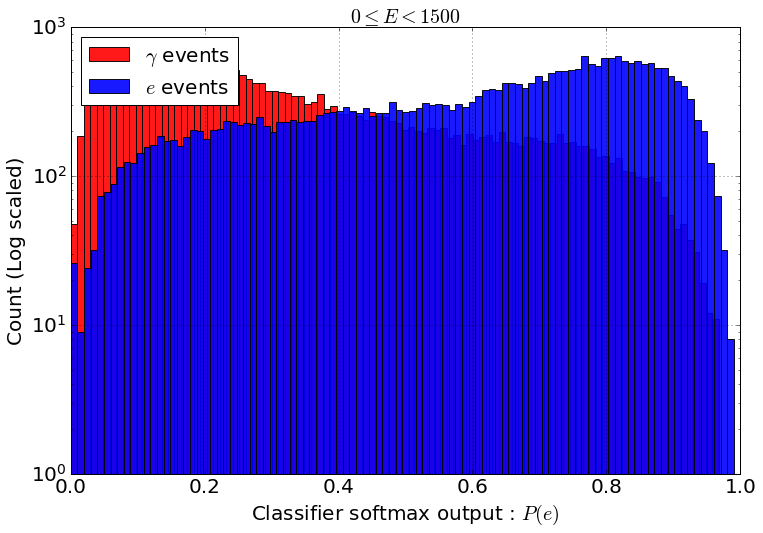

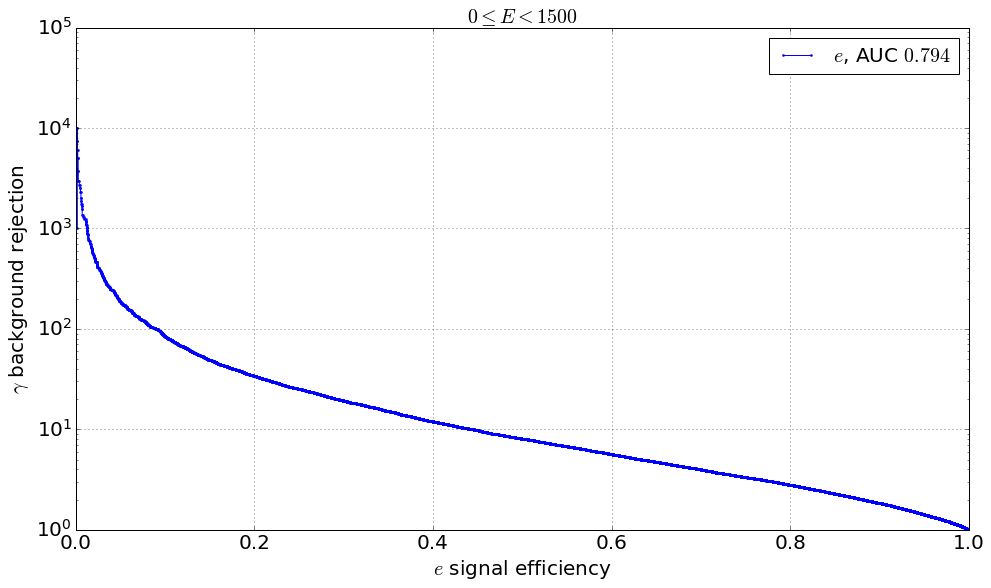

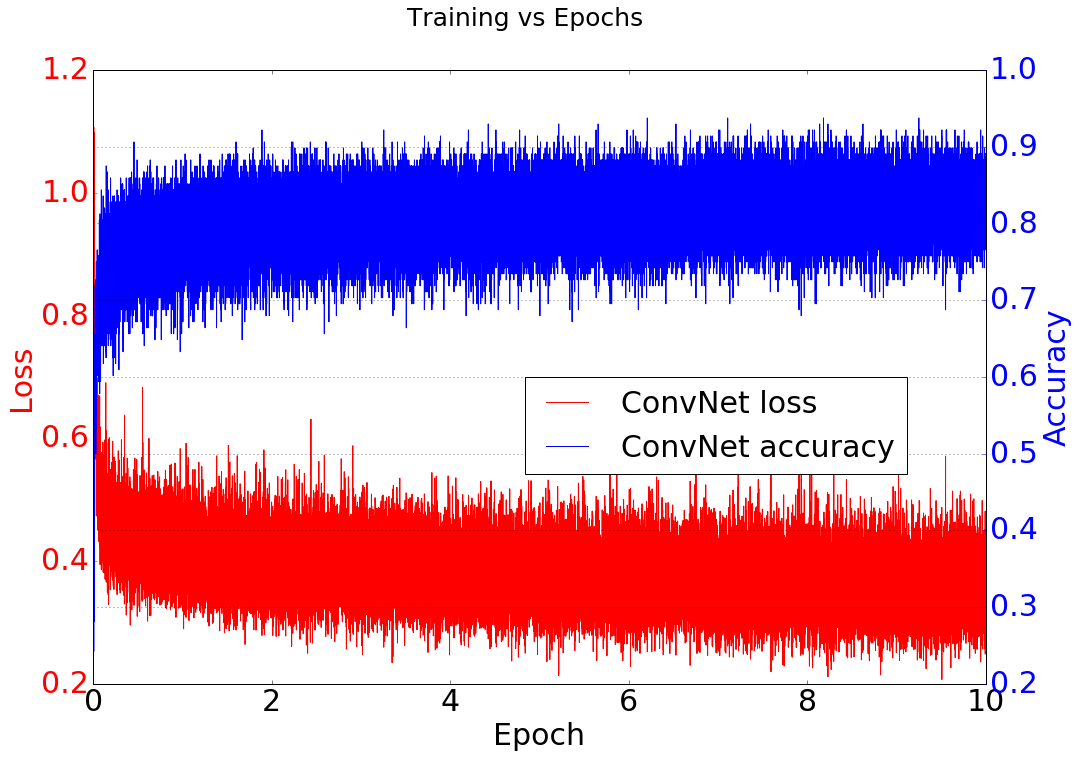

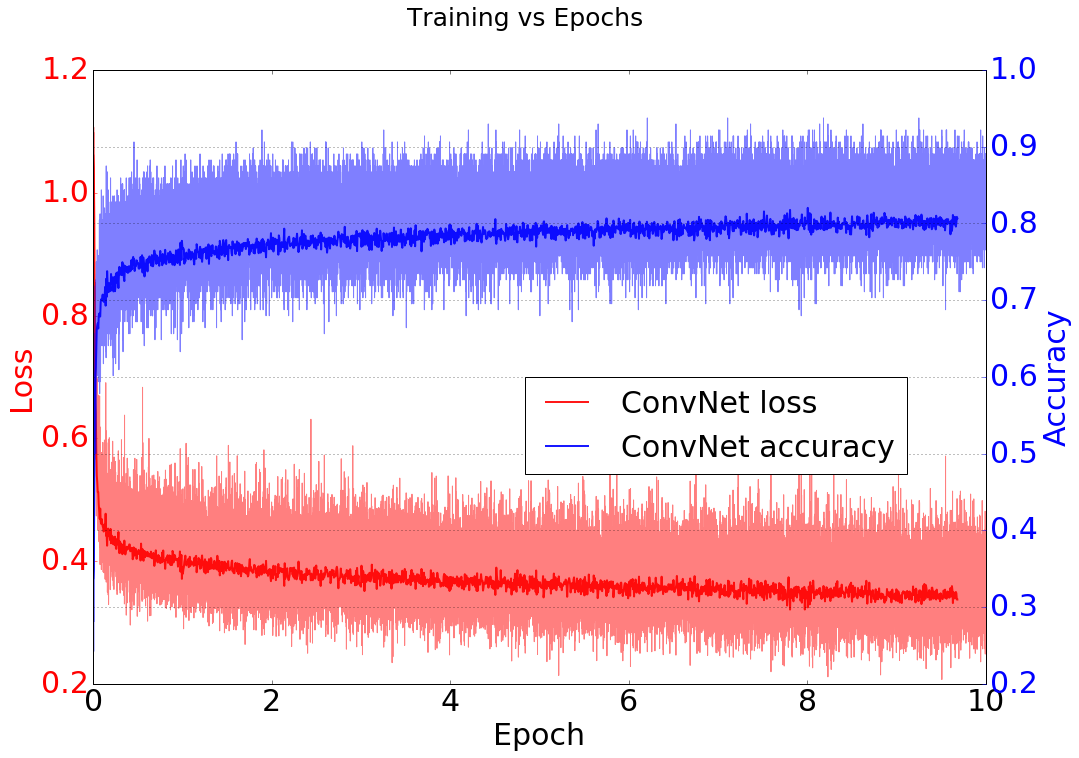

In [2]:
# Using the absolute path
run_id = "20190620_165428"
model_name = "ConvNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Load the numpy arrays into memory
softmaxes = np.load(dump_dir + "softmax.npy")
labels = np.load(dump_dir + "labels.npy")
predictions = np.load(dump_dir + "predictions.npy")
energies = np.load(dump_dir + "energies.npy")

# Check the shapes of the loaded arrays
print("softmaxes shape : ", softmaxes.shape)
print("labels shape : ", labels.shape)
print("predictions shape : ", predictions.shape)
print("energies shape : ", energies.shape)

# Plot the classifier response curve
plot_utils.plot_classifier_response(softmaxes, labels, energies, 
                                    softmax_index_dict={"gamma":0, "e":1},
                                    event_dict={"e":1}, show_plot=True)

# Plot the ROC curve for e vs gamma
plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies, {"gamma":0, "e":1},
                                     "e", "gamma", show_plot=True)

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot the training progress of the current model
plot_utils.plot_training([training_log], [model_name], {model_name:["red", "blue"]},
                         show_plot=True)

# Plot using the downsample intervals
plot_utils.plot_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True)